In [1]:
# omg data challenge

# import the usual suspects
import numpy as np
import pandas as pd
# %matplotlib inline
import matplotlib.pyplot as plt
# import datetime as dt

data_drive = 'drive/MyDrive/Colab Notebooks/data challenges/Customer Cliff Dive/data/'


In [ ]:
# Importing events data and drive location

events = pd.read_csv(data_drive + 'yammer_events.csv')
print(events.head(10))
print(events.describe())

   user_id          occurred_at  ...                  device user_type
0  10522.0  2014-05-02 11:02:39  ...  dell inspiron notebook       3.0
1  10522.0  2014-05-02 11:02:53  ...  dell inspiron notebook       3.0
2  10522.0  2014-05-02 11:03:28  ...  dell inspiron notebook       3.0
3  10522.0  2014-05-02 11:04:09  ...  dell inspiron notebook       3.0
4  10522.0  2014-05-02 11:03:16  ...  dell inspiron notebook       3.0
5  10522.0  2014-05-02 11:03:43  ...  dell inspiron notebook       3.0
6  10612.0  2014-05-01 09:59:46  ...                iphone 5       1.0
7  10612.0  2014-05-01 10:00:18  ...                iphone 5       1.0
8  10612.0  2014-05-01 10:00:53  ...                iphone 5       1.0
9  10612.0  2014-05-01 10:01:24  ...                iphone 5       1.0

[10 rows x 7 columns]
             user_id      user_type
count  340832.000000  325255.000000
mean     9983.835758       1.512238
std      5369.955949       0.754780
min         4.000000       1.000000
25%      5224.00

In [ ]:
# A little data cleaning on events

# what datatypes are we working with here?
print('Initial types')
print(events.dtypes)

# cast types
events['user_id'] = events['user_id'].astype(int)
events['occurred_at'] = pd.to_datetime(events['occurred_at'])

# checking the new types
print('\nCast types')
print(events.dtypes)

Initial types
user_id        float64
occurred_at     object
event_type      object
event_name      object
location        object
device          object
user_type      float64
dtype: object

Cast types
user_id                 int64
occurred_at    datetime64[ns]
event_type             object
event_name             object
location               object
device                 object
user_type             float64
dtype: object


In [ ]:
# and now get an overview of the data distributions in each column

for col in events:
    print(f"\nUnique values in {col}: {len(events[col].unique())}")
    print(f'Max value in {col}: {events[col].max()}')
    print(f'Min value in {col}: {events[col].min()}')



Unique values in user_id: 9760
Max value in user_id: 19065
Min value in user_id: 4

Unique values in occurred_at: 304922
Max value in occurred_at: 2014-08-31 23:03:39
Min value in occurred_at: 2014-05-01 00:54:09

Unique values in event_type: 2
Max value in event_type: signup_flow
Min value in event_type: engagement

Unique values in event_name: 21
Max value in event_name: view_inbox
Min value in event_name: complete_signup

Unique values in location: 47
Max value in location: Venezuela
Min value in location: Argentina

Unique values in device: 26
Max value in device: windows surface
Min value in device: acer aspire desktop

Unique values in user_type: 4
Max value in user_type: 3.0
Min value in user_type: 1.0


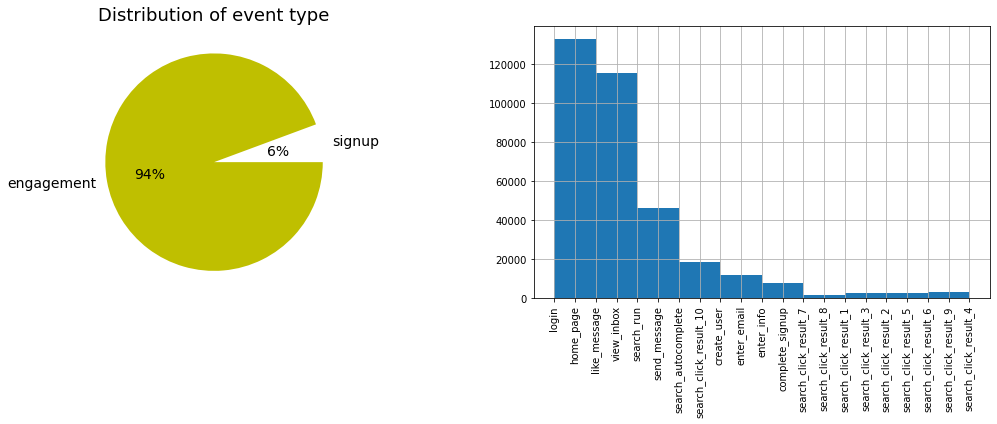

In [ ]:
# a few plots to show the distrtibutions

# event types
signup = events[events.event_type == 'signup_flow'].count()[0]
engagement = events[events.event_type == 'engagement'].count()[0]

# figure setup
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,5))

# plt.subplot(1,2,1)
ax1.pie([signup, engagement],labels=['signup','engagement'],autopct='%.0f%%',colors=['w','y'],textprops={'fontsize':14})
ax1.set_title('Distribution of event type',fontsize=18)
# plt.show()

# event name
plt.subplot(1,2,2)
events.event_name.hist(xrot=90)
ax2.set_title("Engagement Events",fontsize=18)

plt.show()



In [ ]:
# lets break down the events data a bit more
events['occurred_at_day'] = events.occurred_at.dt.floor('D')
events['occurred_at_week'] = events.occurred_at.dt.floor('D') - pd.to_timedelta(events.occurred_at.dt.dayofweek,unit='D')


In [ ]:
# ooo lets make a plot function! I keep writing the same code!

def make_a_dem_plots(data,norm=False):

    # some post-priori variables
    xticks = pd.date_range(start=events.occurred_at_week.unique().min(),end=events.occurred_at_week.unique().max(),freq='2W')
    event_date = pd.to_datetime('2014-08-04') # I only know this post-priori, hard coding it in for all plots

    # ok now the plotting
    plt.figure(figsize=(20,5))
    if norm:
        plt.plot(data.apply(lambda x: x/max(x)),'-o')
    else:
        plt.plot(data,'-o')

    plt.title("Weekly Event Counts",fontsize=18)
    plt.xlabel("Date",fontsize=14)
    plt.ylabel("Normalized number of events",fontsize=14)
    plt.xticks(xticks)
    plt.axvline(x=event_date,linestyle='--',color='k')
    plt.legend(data.columns)
    plt.show()

In [ ]:

# Peeling back the curtain on a few of these columns
print(f"total events = {len(events)}")

print('')
print('Event Types:')
for t in events.event_type.unique():
    print("{} = {}".format(t,sum(events.event_type == t)))

print('')
print('Event names:')
for n in events.event_name.unique():
    print(f"{n} = {sum(events.event_name == n)}")


total events = 340832

Event Types:
engagement = 321575
signup_flow = 19257

Event names:
login = 38610
home_page = 94065
like_message = 59248
view_inbox = 55936
search_run = 13019
send_message = 33105
search_autocomplete = 17820
search_click_result_10 = 506
create_user = 7298
enter_email = 4407
enter_info = 3872
complete_signup = 3680
search_click_result_7 = 709
search_click_result_8 = 690
search_click_result_1 = 1413
search_click_result_3 = 1134
search_click_result_2 = 1499
search_click_result_5 = 968
search_click_result_6 = 805
search_click_result_9 = 784
search_click_result_4 = 1264


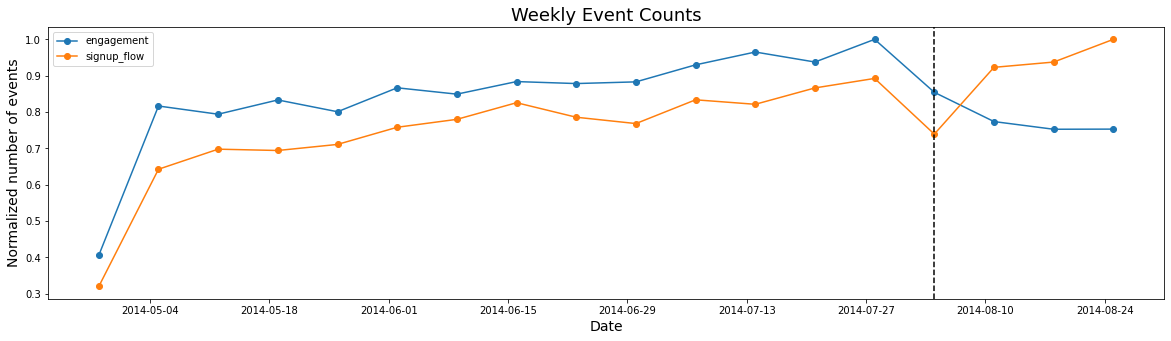

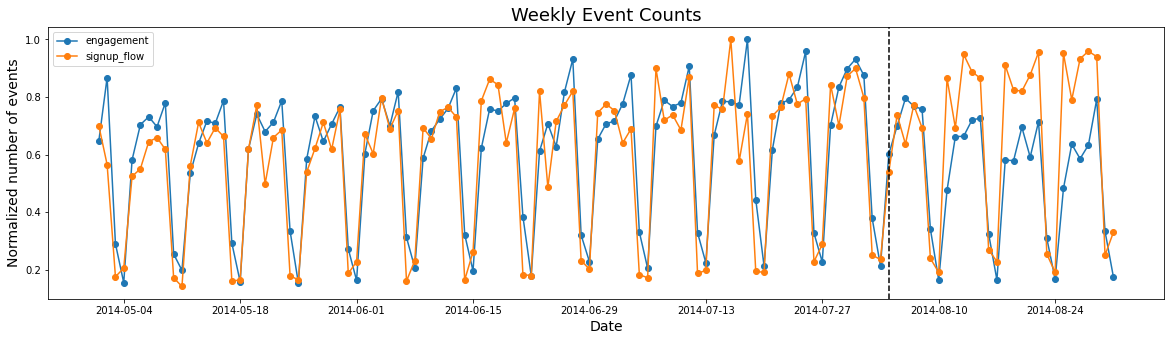

In [ ]:
# lets look at the weekly numbers
data = events.groupby('occurred_at_week')['event_type'].value_counts().unstack()
make_a_dem_plots(data,norm=True)

# and the daily breakdown
data = events.groupby(['occurred_at_day'])['event_type'].value_counts().unstack()
make_a_dem_plots(data,norm=True)

# Not as obvious in the daily breakdown as in the weekly breakdown


Unique events = 21
['login' 'home_page' 'like_message' 'view_inbox' 'search_run'
 'send_message' 'search_autocomplete' 'search_click_result_10'
 'create_user' 'enter_email' 'enter_info' 'complete_signup'
 'search_click_result_7' 'search_click_result_8' 'search_click_result_1'
 'search_click_result_3' 'search_click_result_2' 'search_click_result_5'
 'search_click_result_6' 'search_click_result_9' 'search_click_result_4']


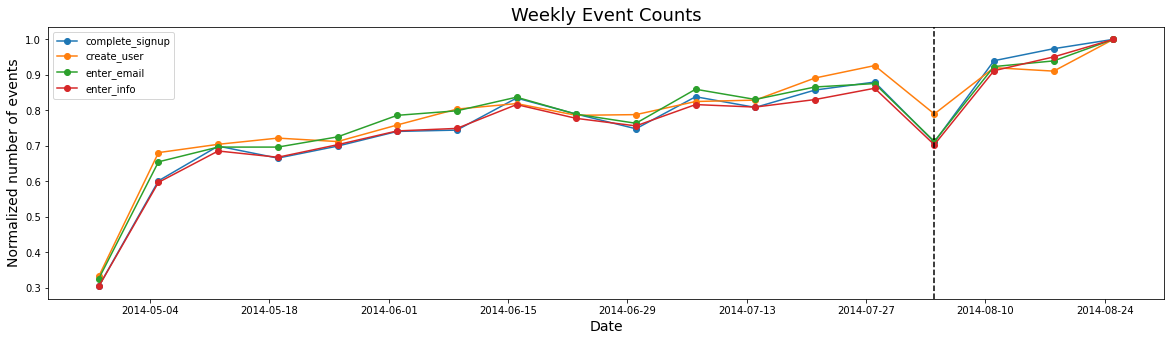

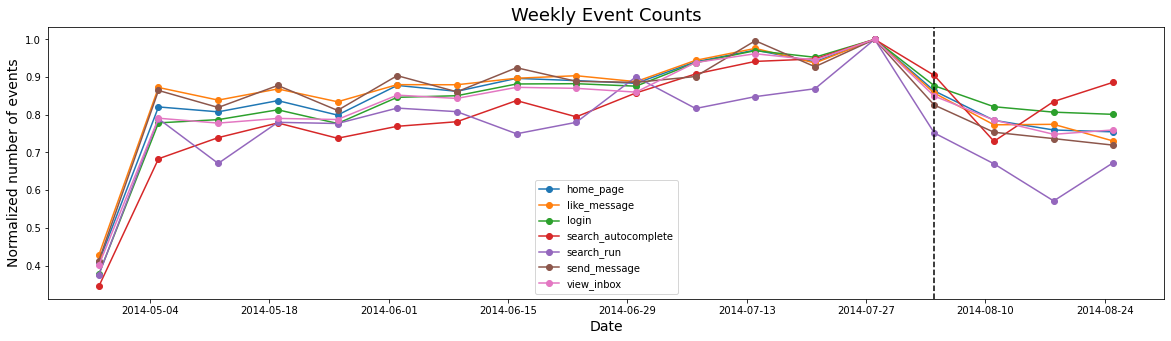

In [ ]:
# Now I want to look at the events.
print(f"Unique events = {len(events.event_name.unique())}")
print(events.event_name.unique())

# Since both signups and engagements took a dip, let's look at both. First signup, 
# since it seemed to recover quickly. Then the engagements.

# Signups
data = events[events.event_type=='signup_flow'].groupby('occurred_at_week')['event_name'].value_counts().unstack()
make_a_dem_plots(data,norm=True)

# Engagements
interesting_events = ['login','home_page','like_message','view_inbox','search_run','send_message','search_autocomplete']
data = events.loc[events.event_name.isin(interesting_events)].groupby('occurred_at_week')['event_name'].value_counts().unstack()
make_a_dem_plots(data,norm=True)

# daily breakdown just for kicks - not super informative
# data = events.loc[events.event_name.isin(interesting_events)].groupby('occurred_at_day')['event_name'].value_counts().unstack()
# make_a_dem_plots(data,norm=True)


Emails time!

In [ ]:
# Now read in the emails table
emails = pd.read_excel(data_drive + 'yammer_emails.xlsx')
print(emails.head(10))
print(emails.dtypes)

   user_id         occurred_at              action  user_type
0        0 2014-05-06 09:30:00  sent_weekly_digest          1
1        0 2014-05-13 09:30:00  sent_weekly_digest          1
2        0 2014-05-20 09:30:00  sent_weekly_digest          1
3        0 2014-05-27 09:30:00  sent_weekly_digest          1
4        0 2014-06-03 09:30:00  sent_weekly_digest          1
5        0 2014-06-03 09:30:25          email_open          1
6        0 2014-06-10 09:30:00  sent_weekly_digest          1
7        0 2014-06-10 09:30:24          email_open          1
8        0 2014-06-17 09:30:00  sent_weekly_digest          1
9        0 2014-06-17 09:30:23          email_open          1
user_id                 int64
occurred_at    datetime64[ns]
action                 object
user_type               int64
dtype: object


In [ ]:
# Adding the datetime info, as in the events table
emails['occurred_at_day'] = emails.occurred_at.dt.floor('D')
emails['occurred_at_week'] = emails.occurred_at_day - pd.to_timedelta(emails.occurred_at.dt.dayofweek,unit='D')
emails

,user_id,occurred_at,action,user_type,occurred_at_day,occurred_at_week
0,0,2014-05-06 09:30:00,sent_weekly_digest,1,2014-05-06,2014-05-05
1,0,2014-05-13 09:30:00,sent_weekly_digest,1,2014-05-13,2014-05-12
2,0,2014-05-20 09:30:00,sent_weekly_digest,1,2014-05-20,2014-05-19
3,0,2014-05-27 09:30:00,sent_weekly_digest,1,2014-05-27,2014-05-26
4,0,2014-06-03 09:30:00,sent_weekly_digest,1,2014-06-03,2014-06-02
...,...,...,...,...,...,...
90384,18814,2014-08-31 12:12:26,email_open,3,2014-08-31,2014-08-25
90385,18814,2014-08-31 12:12:57,email_clickthrough,3,2014-08-31,2014-08-25
90386,18815,2014-08-31 13:39:56,sent_reengagement_email,2,2014-08-31,2014-08-25
90387,18815,2014-08-31 13:40:14,email_open,2,2014-08-31,2014-08-25


total emails = 90389

Email Actions:
sent_weekly_digest = 57267
email_open = 20459
email_clickthrough = 9010
sent_reengagement_email = 3653

User types:
1 = 0
3 = 0
2 = 0


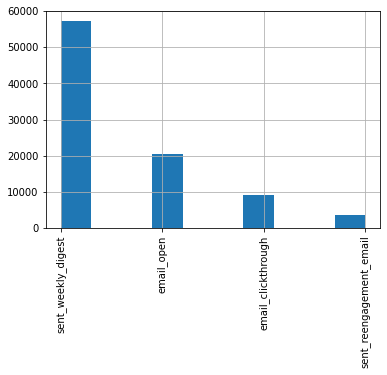

In [ ]:
# lets look at the different actions in here

# Peeling back the curtain on a few of these columns
print(f"total emails = {len(emails)}")

print('')
print('Email Actions:')
for a in emails.action.unique():
    print("{} = {}".format(a,sum(emails.action == a)))

print('\nUser types:')
for u in emails.user_type.unique():
    print(f"{u} = {sum(emails.action == u)}")

emails.action.hist(xrot=90)

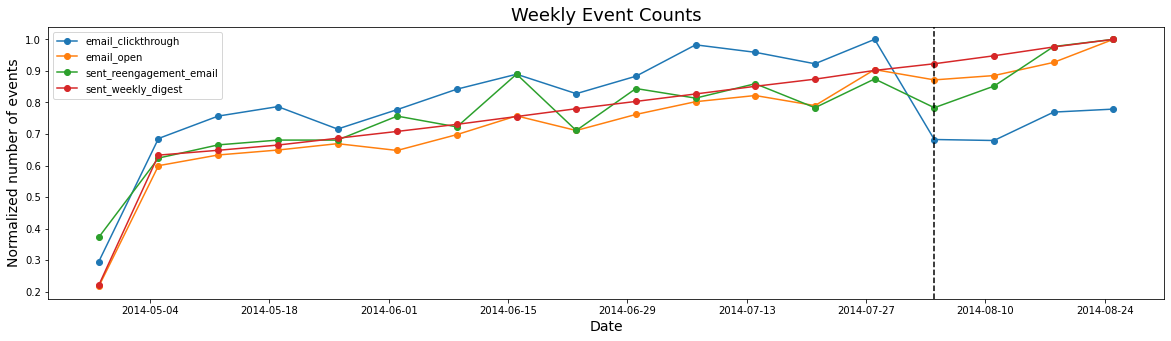

In [ ]:
# Ok now lets look at each of these actions over time

data = emails.groupby('occurred_at_week')['action'].value_counts().unstack()
make_a_dem_plots(data,norm=True)

In [ ]:
# Clickthrough attribution

# generate a column to keep track of digest vs reengagement
emails['clickthrough_attribution'] = NaN
attributions = ['weekly_digest','reengagement']

# Let's try to get devie type into the mix
emails['device_type'] = '?'
# df = pd.concat([events[['user_id','event_name','occurred_at','device_type']].rename(columns={'action':'event_name'}),emails[['user_id','action','occurred_at','device_type']])], ignore_index=False))

# Parse the data by users
grouped_by_user = emails.groupby(['user_id'])#['action','occurred_at']

for user, user_data in grouped_by_user:
        
    # Check the clickthrough times - I want to chain my way to attribution.
    # Clickthroughs may be associated with 'weekly digest' or 'reengagement'
    clickthrough_times = user_data[user_data.action=='email_clickthrough']

    # email open times is the middle of the attribution chain
    email_open_times = user_data[user_data.action=='email_open']

    # And the two things we want to attribute clickthroughs to
    digest_sent_times = user_data[user_data.action=='sent_weekly_digest']
    reengagement_sent_times = user_data[user_data.action=='sent_reengagement_email']

    # Now trying to get device type into the mix
    login_times = events[(events['user_id']==user) & (events['event_name']=='login')]

    for attribute_to in attributions:

        # print(f"\n -----user_id = {idx} -----")
        for clickthrough_idx, clickthrough in clickthrough_times.iterrows():
            
            # print(f"\nclickthrough time = {clickthrough.occurred_at}")
                        
            # Check to see if any clickthroughs occurred within 1 minute of opening the email
            emails_to_check = email_open_times[email_open_times.occurred_at < clickthrough.occurred_at]
            email_clickthrough_lag = clickthrough.occurred_at - emails_to_check.occurred_at
            closest_email = emails.loc[email_clickthrough_lag.idxmin()]

            # print(f"open email time = {closest_email.occurred_at}")

            # If the clickthough happened within a minute of an email open, I'll
            # attribute that clickthough to that email.
            if email_clickthrough_lag.min() < pd.to_timedelta('1m'):

                # Same as above, checking to see if the email open was preceeded shortly by a digest being sent
                if attribute_to == "weekly_digest":
                    sents_to_check = digest_sent_times[digest_sent_times.occurred_at < closest_email.occurred_at]
                elif attribute_to == "reengagement":
                    sents_to_check = reengagement_sent_times[reengagement_sent_times.occurred_at < closest_email.occurred_at]
                sent_lag = closest_email.occurred_at - sents_to_check.occurred_at

                # print(f"digest sent time = {emails.occurred_at.loc[minlagidx]}")

                if sent_lag.min() < pd.to_timedelta('1m'):
                    # print("Thats a bingo!")
                    # emails['clickthrough_attribution'].loc[clickthrough_idx] = attribute_to
                    # print(emails.at[clickthrough_idx,'clickthrough_attribution'])
                    emails.at[clickthrough_idx,'clickthrough_attribution'] = attribute_to

                    logins_to_check = login_times[login_times.occurred_at > clickthrough.occurred_at]
                    login_lag = logins_to_check.occurred_at - clickthrough.occurred_at

                    if login_lag.min() < pd.to_timedelta('1m'):

                        closest_login = events.loc[login_lag.idxmin()]
                        # emails['device_type'].loc[clickthrough_idx] = closest_login.device_type
                        emails.at[clickthrough_idx,'device_type'] = closest_login.device_type


# Wow this takes some time to run. I bet there is a faster way, may be using multiple 
# columns in groupby...

NameError: ignored

In [ ]:
data = emails.groupby('occurred_at_week')['clickthrough_attribution'].value_counts().unstack()
make_a_dem_plots(data,norm=False)

data = emails[emails.clickthrough_attribution=='weekly_digest']
data = data.groupby('occurred_at_week')['device_type'].value_counts().unstack()
print('Weekly Digest')
make_a_dem_plots(data,norm=False)

data = emails[emails.clickthrough_attribution=='reengagement']
data = data.groupby('occurred_at_week')['device_type'].value_counts().unstack()
print('Reengagement:')
make_a_dem_plots(data,norm=False)

NameError: ignored

In [ ]:
3# map the devices to 3 types
events['device_type'] = events.device

events['device_type'] = events.device_type.replace(['iphone 5','iphone 4s','iphone 5s','nexus 7','nexus 5','samsung galaxy s4',
                'htc one','nokia lumia 635','samsung galaxy note','amazon fire phone'],'phone')

events['device_type'] = events.device_type.replace(['dell inspiron notebook','windows surface','macbook air','macbook pro',
                'lenovo thinkpad','acer aspire notebook','asus chromebook','acer aspire desktop',
                'mac mini','hp pavilion desktop','dell inspiron desktop'],'laptop')

events['device_type'] = events.device_type.replace(['kindle fire','ipad mini','nexus 7','nexus 5','samsumg galaxy tablet',
                'ipad air','nexus 10'],'tablet')

data = events.groupby('occurred_at_week')['device_type'].value_counts().unstack()
make_a_dem_plots(data,norm=True)

In [ ]:
# print(events[events.user_id==4][['event_name','occurred_at']].sort_values('occurred_at'))
# print(emails[emails.user_id==4][['action','occurred_at']].sort_values('occurred_at'))


# hmm can I merge these datasets to tell me what device someone is on? That maybe 
# could explain the difference across devices-types...

emails['device_type'] = np.nan
df = pd.concat([events[['user_id','event_name','occurred_at','device_type']],emails[['user_id','action','occurred_at','device_type']].rename(columns={'action':'event_name'})], ignore_index=False).sort_values(['user_id','occurred_at'])

df[df.user_id==8]


In [ ]:
# And the users
users = pd.read_excel(data_drive + "yammer_users.xlsx")
users.head()